In [1]:
%matplotlib inline

# Sequence Alignment Algorithms

- Sequence alignment algorithms are ways to **arrange two or many biological sequences** 
- They **identify regions of similarity** that may indicate to functional, structural, or evolutionary relationships between the sequences.


## Biological information in arrays


#### Data science in biology originated from the biological data stored in sequences

### 3 main biological data types

<img src="images/biological_seq-1.png" width="500">

*Image soure: Shutter Stock* (adpated)

### Central dogma of molecular biology

<img src="images/biological_seq-2.png" width="600">

*Image soure: Shutter Stock* (adapted)

### ... explained in data terms

<img src="images/biological_seq-3.png" width="600">

*Image soure: Shutter Stock*  (adapted)

### More about Proteins

- Proteins are class of chemicals in our body that **makes our body function**. 
- In a healthy individual, proteins make them **see, listen, walk and talk and think, process information**, and control immune response. 
- In **diseases** some these protein are **dysregulated**.

<img src="images/human_protein-4.png" width="300">

*Image source: [loxooncology](https://www.loxooncology.com/genomically-defined-cancers)*

### Protein composition

- Proteins are made up of different combinations of 20 amino acids. 
- Based on how they are arranged, their characters and functions are decided.

<img src="images/protein-5.png" width="300">

Image credit: *Wikimedia commons by LadyofHats* 

**Each amino acid (aa) is represented as a letter:**

In [2]:
amino_acid_list = ('A', 'C', 'D', 'E', 'F',
                   'G', 'H', 'I', 'K', 'L',
                   'M', 'N', 'P', 'Q', 'R',
                   'S', 'T', 'V', 'W', 'Y')

1. **Structural components**: Several amino acid in proteins are arranged closely, forming compact structures.
2. **Disorder region**: Several amino acid don't form structures and exist as disorder region.

<img src="images/protein_str-explained.png" width="600">

Image credit: *Wikimedia commons by LadyofHats* 

**Role of protein composition**

- Protein composition **determine their physics and chemical nature**.
- It makes them function as **machines in different part of body** where it’s needed. 

## Evolutionary biology

- Study of evolutionary processes that **produced the diversity of life on Earth**, starting from a single common ancestor. 
    - **natural selection**, common descent, and speciation (origin of species).

### Evolution of proteins

- Process of change in the sequence composition
- Studied by **comparing the sequences and structures** of proteins (*homologs*) from other organisms

#### Example

<img src="images/homolog-sized.png">

### Use of such comparative studies

- observe pattern of conservation
- identify common region that are present in both sequences
- transfer functions, understand origin of these sequences etc.

### Complexity increases when comparing proteins with longer aa chains

**Full length protein sequence of human P53**
```
>P53_HUMAN Cellular tumor antigen p53 OS=Homo sapiens length=393
MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGP
DEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAK
SVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHE
RCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNS
SCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHELP
PGSTKRALPNNTSSSPQPKKKPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPG
GSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD
```

**Full length protein sequence of mouse P53**
```
>P53_MOUSE Cellular tumor antigen p53 OS=Mus musculus length=390
MTAMEESQSDISLELPLSQETFSGLWKLLPPEDILPSPHCMDDLLLPQDVEEFFEGPSEA
LRVSGAPAAQDPVTETPGPVAPAPATPWPLSSFVPSQKTYQGNYGFHLGFLQSGTAKSVM
CTYSPPLNKLFCQLAKTCPVQLWVSATPPAGSRVRAMAIYKKSQHMTEVVRRCPHHERCS
DGDGLAPPQHLIRVEGNLYPEYLEDRQTFRHSVVVPYEPPEAGSEYTTIHYKYMCNSSCM
GGMNRRPILTIITLEDSSGNLLGRDSFEVRVCACPGRDRRTEEENFRKKEVLCPELPPGS
AKRALPTCTSASPPQKKKPLDGEYFTLKIRGRKRFEMFRELNEALELKDAHATEESGDSR
AHSSYLKTKKGQSTSRHKKTMVKKVGPDSD
```

In [3]:
# Example protein: P53: acts as a tumor suppressor in many cancers
# Source: UniProt: https://www.uniprot.org/uniprot/P04637

human_p53 = 'TFSDLWKLLPENNV' # first 10 aa of the full length (393 aa)
mouse_p53 = 'SQETFSGLWKLLPP' # first 10 aa of the full length (390 aa)

# Protein Similary and Alignment Algorithms

Protein sequences are aligned and their smiliarity is scored.

## Pairwise Alignments

### **Global alignment: Needleman Wunsch Algorithm**

- Assigns a score to every possible alignment
- Finds alignments with highest score

It was the first application of **dynamic programming** 

- simplifies a decision by breaking it down into smaller problems (all alignments)
- finds optimal solution (best aligment)**Local alignment (Smith-Waterman algorithm)*

In [4]:
human_p53 = 'TFSDLWKLLPENNV'
mouse_p53 = 'SQETFSGLWKLLPP'

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
def create_substution_matrix(residue_list, match_score=1,
                             mismatch_score=-1):
    '''
    This function creates a substituion matrix for residues:

    Arguments:
    - residue_list:     A list of amino acid or dna/rna residues.
    - match_score:      An integer number indicating match score. (default score = 1)
    - mismatch_score:   An integer number indicating mismatch score. (default score = -1)
    '''
    scoring_matrix = pd.DataFrame(index=residue_list, columns=residue_list)
    scoring_matrix = scoring_matrix.fillna(0)
    for residue_col in residue_list:
        for residue_row in residue_list:
            if residue_col == residue_row:
                scoring_matrix.loc[residue_col, residue_row] = match_score
            else:
                scoring_matrix.loc[residue_col, residue_row] = mismatch_score
    return scoring_matrix

scoring_matrix = create_substution_matrix(amino_acid_list)

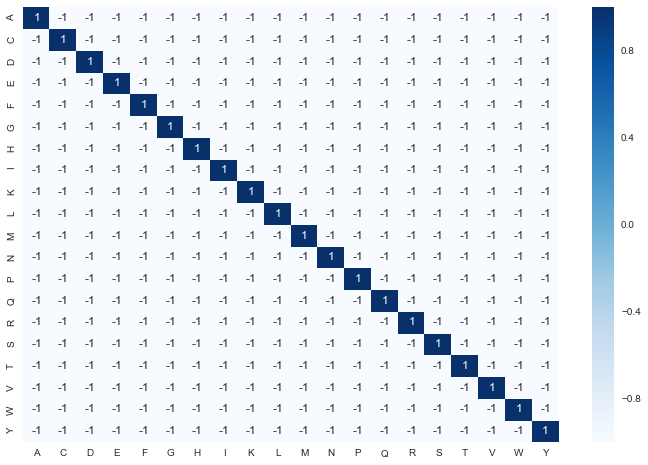

In [7]:
def create_heatmap_from_matrix(matrix_name, filename='default', color='Blues'):
    sns.set(rc={"figure.figsize":(12,8)})
    df = pd.DataFrame(matrix_name)
    g = sns.heatmap(df, annot=True, fmt='g', cmap=color)
    if not filename == 'default':
        g.get_figure().savefig(os.path.join(file_path, filename))
create_heatmap_from_matrix(scoring_matrix)

In [8]:
def create_dynamic_prog_matrix(seq1, seq2, scoring_matrix, 
                               gap_penalty=-1):
    '''
    This function creates a scorinf matrix for two 
    sequences using dynamic programming:

    Arguments:
    - seq1:            First amino acid sequence
    - seq2:            Second amino acid sequence
    - scoring_matrix:  Scoring matrix for amino acid
    - gap_penalty:     An integer number indicating gap 
                       penalty/score. (default value = -1)
    '''
    index_list = [0]+list(seq1)
    column_list = [0]+list(seq2)
    dp_matrix = pd.DataFrame(index=index_list, columns=column_list)
    dp_matrix = dp_matrix.fillna(0)
    for i, residue_seq1 in enumerate(list(seq1)):
        dp_matrix.iloc[i+1, 0] = (i+1)*-1
        for j, residue_seq2 in enumerate(list(seq2)):
            dp_matrix.iloc[0, j+1] = (j+1)*-1
            dp_matrix.loc[residue_seq1,
                          residue_seq2] = scoring_matrix.loc[
                              residue_seq1, residue_seq2]
    scored_dp_matrix = _calculate_alignment_scores(dp_matrix, gap_penalty)
    return scored_dp_matrix

def _calculate_alignment_scores(dp_matrix, gap_penalty):
    for i, rows in enumerate(dp_matrix.index.values):
        if not rows == 0:
            for j, cols in enumerate(dp_matrix.columns.values):
                if  not cols == 0:
                    current_score = dp_matrix.iloc[i, j]
                    left_score = dp_matrix.iloc[i, j-1] + gap_penalty
                    up_score = dp_matrix.iloc[i-1, j] + gap_penalty
                    diag_score = dp_matrix.iloc[i-1, j-1] + current_score
                    high_score = max([left_score, up_score, diag_score])
                    dp_matrix.iloc[i, j] = high_score
    return(dp_matrix)

scored_dp_matrix = create_dynamic_prog_matrix(human_p53, mouse_p53,
                                               scoring_matrix)
print(scored_dp_matrix)

    0   S   Q   E   T   F   S   G  L  W   K   L   L   P   P
0   0  -1  -2  -3  -4  -5  -6  -7 -8 -9 -10 -11 -12 -13 -14
T  -1  -1  -2  -3  -2  -3  -4  -5 -6 -7  -8  -9 -10 -11 -12
F  -2  -2  -2  -3  -3  -1  -2  -3 -4 -5  -6  -7  -8  -9 -10
S  -3  -1  -2  -3  -4  -2   0  -1 -2 -3  -4  -5  -6  -7  -8
D  -4  -2  -2  -3  -4  -3  -1  -1 -2 -3  -4  -5  -6  -7  -8
L  -5  -3  -3  -3  -4  -4  -2  -2  0 -1  -2  -3  -4  -5  -6
W  -6  -4  -4  -4  -4  -5  -3  -3 -1  1   0  -1  -2  -3  -4
K  -7  -5  -5  -5  -5  -5  -4  -4 -2  0   2   1   0  -1  -2
L  -8  -6  -6  -6  -6  -6  -5  -5 -3 -1   1   3   2   1   0
L  -9  -7  -7  -7  -7  -7  -6  -6 -4 -2   0   2   4   3   2
P -10  -8  -8  -8  -8  -8  -7  -7 -5 -3  -1   1   3   5   4
E -11  -9  -9  -7  -8  -9  -8  -8 -6 -4  -2   0   2   4   4
N -12 -10 -10  -8  -8  -9  -9  -9 -7 -5  -3  -1   1   3   3
N -13 -11 -11  -9  -9  -9 -10 -10 -8 -6  -4  -2   0   2   2
V -14 -12 -12 -10 -10 -10 -10 -11 -9 -7  -5  -3  -1   1   1


In [9]:
def trace_best_alignment(scored_dp_matrix, match_score=1,
                         mismatch_score=-1, gap_penalty=-1):
    '''
    This function traces back the best alignment.
    Diagonal arrow is a match or mismatch. Horizontal arrows introduce
    gap ("-") in the row and vertical arrows introduce gaps in the column.

    Arguments:
    - scored_dp_matrix:     scored matrix for two sequences.
    - match_score:          An integer number indicating match score. 
                            (default score = 1)
    - mismatch_score:       An integer number indicating mismatch score. 
                            (default score = -1)
    - gap_penalty:          An integer number indicating gap penalty/score. 
                            (default score = -1)
    '''
    i = len(scored_dp_matrix.index.values)-1
    j = len(scored_dp_matrix.columns.values)-1
    row_residue_list = []
    col_residue_list = []
    match_positions = []
    print("Trackback type:\n")
    while i > 0 and j > 0:
        
        current_score = scored_dp_matrix.iloc[i, j]
        left_score = scored_dp_matrix.iloc[i, j-1]
        up_score = scored_dp_matrix.iloc[i-1, j]
        diag_score = scored_dp_matrix.iloc[i-1, j-1]
        row_val = scored_dp_matrix.index.values[i]
        col_val = scored_dp_matrix.columns.values[j]
        trackback_type = ""  
        if i > 1 and j > 1 and (current_score == diag_score + match_score and row_val == col_val):
            trackback_type = "diagonal_match"
            row_val = scored_dp_matrix.index.values[i]
            col_val = scored_dp_matrix.columns.values[j]
            i -= 1
            j -= 1
            match_positions.append(row_val)
        elif i > 1 and j > 1 and (current_score == diag_score + mismatch_score and row_val != col_val):
            trackback_type = "diagonal_mismatch"
            row_val = scored_dp_matrix.index.values[i]
            col_val = scored_dp_matrix.columns.values[j]
            i -= 1
            j -= 1
            match_positions.append(row_val)
        elif i > 0 and (current_score == up_score + gap_penalty):
            trackback_type = "up"
            row_val = scored_dp_matrix.index.values[i]
            col_val = '-'
            i -= 1
            # match_Score -= 1
        elif j > 0 and (current_score == left_score + gap_penalty):
            trackback_type = "left"
            col_val = scored_dp_matrix.columns.values[j]
            row_val = '-'
            j -= 1
            # match_Score -= 1
        else:
            row_val = scored_dp_matrix.index.values[i]
            col_val = scored_dp_matrix.columns.values[j]
            i -= 1
            j -= 1
            match_positions.append(row_val)
        print(trackback_type)
        row_residue_list.append(row_val)
        col_residue_list.append(col_val)
    print("Total aligned positions: {}".format(len(match_positions)))
    col_seq = ''.join(map(str, col_residue_list[::-1]))
    row_seq = ''.join(map(str, row_residue_list[::-1]))
    return col_seq, row_seq
aligned_seq1, aligned_seq2 = trace_best_alignment(scored_dp_matrix)

Trackback type:

diagonal_mismatch
up
up
up
diagonal_match
diagonal_match
diagonal_match
diagonal_match
diagonal_match
diagonal_match
diagonal_mismatch
diagonal_match
diagonal_match

Total aligned positions: 11


Optimal global alignment of the given sequences is:
TFSGLWKLLPP---
TFSDLWKLLPENNV


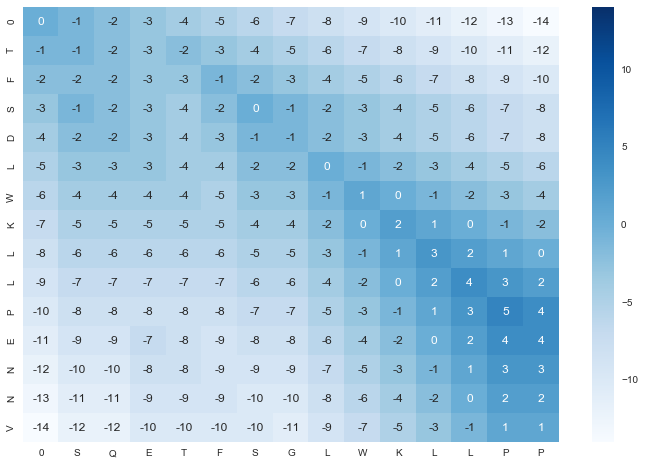

In [19]:
print('Optimal global alignment of the given sequences is:\n{}\n{}'.format(
    aligned_seq1, aligned_seq2))
create_heatmap_from_matrix(scored_dp_matrix)

### Substituion Matrix for Proteins

A substitution matrix used for sequence alignment of proteins are used to score alignments between evolutionarily divergent protein sequences. The most popular metrices is BLOSUM (BLOcks SUbstitution Matrix) matrix, [provided by NCBI](https://www.ncbi.nlm.nih.gov/Class/BLAST/BLOSUM62.txt).

This matrix gives a similarity score to appropriately align similar (even when not identical) aa based on their bio-chemical properties.

In [11]:
with open('blosum62.bla', 'r') as in_fh:
    print(in_fh.read())

#  Matrix made by matblas from blosum62.iij
#  * column uses minimum score
#  BLOSUM Clustered Scoring Matrix in 1/2 Bit Units
#  Blocks Database = /data/blocks_5.0/blocks.dat
#  Cluster Percentage: >= 62
#  Entropy =   0.6979, Expected =  -0.5209
 A  R  N  D  C  Q  E  G  H  I  L  K  M  F  P  S  T  W  Y  V  B  Z  X  *
 4 -1 -2 -2  0 -1 -1  0 -2 -1 -1 -1 -1 -2 -1  1  0 -3 -2  0 -2 -1  0 -4 
-1  5  0 -2 -3  1  0 -2  0 -3 -2  2 -1 -3 -2 -1 -1 -3 -2 -3 -1  0 -1 -4 
-2  0  6  1 -3  0  0  0  1 -3 -3  0 -2 -3 -2  1  0 -4 -2 -3  3  0 -1 -4 
-2 -2  1  6 -3  0  2 -1 -1 -3 -4 -1 -3 -3 -1  0 -1 -4 -3 -3  4  1 -1 -4 
 0 -3 -3 -3  9 -3 -4 -3 -3 -1 -1 -3 -1 -2 -3 -1 -1 -2 -2 -1 -3 -3 -2 -4 
-1  1  0  0 -3  5  2 -2  0 -3 -2  1  0 -3 -1  0 -1 -2 -1 -2  0  3 -1 -4 
-1  0  0  2 -4  2  5 -2  0 -3 -3  1 -2 -3 -1  0 -1 -3 -2 -2  1  4 -1 -4 
 0 -2  0 -1 -3 -2 -2  6 -2 -4 -4 -2 -3 -3 -2  0 -2 -2 -3 -3 -1 -2 -1 -4 
-2  0  1 -1 -3  0  0 -2  8 -3 -3 -1 -2 -1 -2 -1 -2 -2  2 -3  0  0 -1 -4 
-1 -3 -3 -3 -1 -3 -3 -4

In [17]:
# Format BLOSUM subsitution file to pandas matrix

def read_blosum_file_to_matrix(blosum_file):
    '''
    Creates a matrix from NCBI BLOSUM file.

    Arguments:
    - blosum_file:     provide local file BLOSUM substitution matrix.
                       (Download the current version: 
                        https://www.ncbi.nlm.nih.gov/Class/BLAST/BLOSUM62.txt)
    '''
                
    header_list= ['A', 'R', 'N', 'D', 'C', 'Q',
                      'E', 'G', 'H', 'I', 'L', 'K', 
                      'M', 'F', 'P', 'S', 'T', 'W', 
                      'Y', 'V', 'B', 'Z', 'X', '*'] # * is gap
    blosum = pd.read_csv(blosum_file, skiprows=6, delim_whitespace=True)
    blosum = blosum.replace('NaN', 0)
    blosum.columns = header_list
    blosum.index = header_list
    return blosum
blosum = read_blosum_file_to_matrix('blosum62.txt')
print(blosum)

   A  R  N  D  C  Q  E  G  H  I ...  P  S  T   W  Y  V  B  Z  X  *
A  4 -1 -2 -2  0 -1 -1  0 -2 -1 ... -1  1  0  -3 -2  0 -2 -1  0 -4
R -1  5  0 -2 -3  1  0 -2  0 -3 ... -2 -1 -1  -3 -2 -3 -1  0 -1 -4
N -2  0  6  1 -3  0  0  0  1 -3 ... -2  1  0  -4 -2 -3  3  0 -1 -4
D -2 -2  1  6 -3  0  2 -1 -1 -3 ... -1  0 -1  -4 -3 -3  4  1 -1 -4
C  0 -3 -3 -3  9 -3 -4 -3 -3 -1 ... -3 -1 -1  -2 -2 -1 -3 -3 -2 -4
Q -1  1  0  0 -3  5  2 -2  0 -3 ... -1  0 -1  -2 -1 -2  0  3 -1 -4
E -1  0  0  2 -4  2  5 -2  0 -3 ... -1  0 -1  -3 -2 -2  1  4 -1 -4
G  0 -2  0 -1 -3 -2 -2  6 -2 -4 ... -2  0 -2  -2 -3 -3 -1 -2 -1 -4
H -2  0  1 -1 -3  0  0 -2  8 -3 ... -2 -1 -2  -2  2 -3  0  0 -1 -4
I -1 -3 -3 -3 -1 -3 -3 -4 -3  4 ... -3 -2 -1  -3 -1  3 -3 -3 -1 -4
L -1 -2 -3 -4 -1 -2 -3 -4 -3  2 ... -3 -2 -1  -2 -1  1 -4 -3 -1 -4
K -1  2  0 -1 -3  1  1 -2 -1 -3 ... -1  0 -1  -3 -2 -2  0  1 -1 -4
M -1 -1 -2 -3 -1  0 -2 -3 -2  1 ... -2 -1 -1  -1 -1  1 -3 -1 -1 -4
F -2 -3 -3 -3 -2 -3 -3 -3 -1  0 ... -4 -2 -2   1  3 -1 -3 -3 -

In [13]:
## Calling the function create_dynamic_prog_matrix 
# with blosum substituion matrix and gap penalty -4

scored_dp_matrix_blosum = create_dynamic_prog_matrix(
                            human_p53, mouse_p53, 
                            blosum, gap_penalty=-4)
print(scored_dp_matrix_blosum)

    0   S   Q   E   T   F   S   G   L   W   K   L   L   P   P
0   0  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13 -14
T  -1   1  -2  -3   2  -2  -4  -8  -8 -10 -10 -11 -12 -13 -14
F  -2  -3  -2  -5  -2   8   4   0  -4  -7 -11 -10 -11 -15 -17
S  -3   2  -2  -2  -4   4  12   8   4   0  -4  -8 -12 -12 -16
D  -4  -2   2   0  -3   0   8  11   7   3  -1  -5  -9 -13 -13
L  -5  -6  -2  -1  -1  -3   4   7  15  11   7   3  -1  -5  -9
W  -6  -8  -6  -5  -3   0   0   3  11  26  22  18  14  10   6
K  -7  -6  -7  -5  -6  -4   0  -1   7  22  31  27  23  19  15
L  -8  -9  -8  -9  -6  -6  -4  -4   3  18  27  35  31  27  23
L  -9 -10 -11 -11 -10  -6  -8  -8   0  14  23  31  39  35  31
P -10 -10 -11 -12 -12 -10  -7 -10  -4  10  19  27  35  46  42
E -11 -10  -8  -6 -10 -14 -10  -9  -8   6  15  23  31  42  45
N -12 -10 -10  -8  -6 -10 -13 -10 -12   2  11  19  27  38  41
N -13 -11 -10 -10  -8  -9  -9 -13 -13  -2   7  15  23  34  37
V -14 -15 -13 -12 -10  -9 -11 -12 -12  -6   3  11  19  30  33


In [14]:
## Edited the previous function trace_best_alignment 
## by removing match and mismatch score

def trace_best_alignment_with_blosum(scored_dp_matrix, gap_penalty=-4):
    '''
    This function traces back the best alignment.
    Diagonal arrow is a match or mismatch. Horizontal arrows introduce
    gap ("-") in the row and vertical arrows introduce gaps in the column.

    Arguments:
    - scored_dp_matrix:   scored matrix for two sequences.
    - gap_penalty:        An integer number indicating gap penalty/score. 
                          (default gap penalty in NCBI BLOSUM62 = -4)
    '''
    i = len(scored_dp_matrix.index.values)-1
    j = len(scored_dp_matrix.columns.values)-1
    row_residue_list = []
    col_residue_list = []
    match_positions = []
    print("\nTrackback type:")
    while i > 0 and j > 0:
        current_score = scored_dp_matrix.iloc[i, j]
        left_score = scored_dp_matrix.iloc[i, j-1]
        up_score = scored_dp_matrix.iloc[i-1, j]
        diag_score = scored_dp_matrix.iloc[i-1, j-1]
        row_val = scored_dp_matrix.index.values[i]
        col_val = scored_dp_matrix.columns.values[j]
        trackback_type = ""  
        if i > 1 and j > 1 and current_score == diag_score:
            trackback_type = "diagonal_match"
            row_val = scored_dp_matrix.index.values[i]
            col_val = scored_dp_matrix.columns.values[j]
            i -= 1
            j -= 1
            match_positions.append(row_val)
        elif i > 0 and (current_score == up_score + gap_penalty):
            trackback_type = "up"
            row_val = scored_dp_matrix.index.values[i]
            col_val = '-'
            i -= 1
        elif j > 0 and (current_score == left_score + gap_penalty):
            trackback_type = "left"
            col_val = scored_dp_matrix.columns.values[j]
            row_val = '-'
            j -= 1
        else:
            trackback_type = "diagonal_match"
            row_val = scored_dp_matrix.index.values[i]
            col_val = scored_dp_matrix.columns.values[j]
            i -= 1
            j -= 1
            match_positions.append(row_val)
        print(trackback_type)
        row_residue_list.append(row_val)
        col_residue_list.append(col_val)
    print("\nTotal aligned positions: {}".format(len(match_positions)))
    col_seq = ''.join(map(str, col_residue_list[::-1]))
    row_seq = ''.join(map(str, row_residue_list[::-1]))
    return col_seq, row_seq

Input sequences:
SQETFSGLWKLLPP
TFSDLWKLLPENNV

Trackback type:
up
up
up
diagonal_match
diagonal_match
diagonal_match
diagonal_match
diagonal_match
diagonal_match
diagonal_match
diagonal_match
diagonal_match
diagonal_match
diagonal_match

Total aligned positions: 11
Optimal global alignment of the given sequences using BLOSUM62 is:
TFSGLWKLLPP---
TFSDLWKLLPENNV


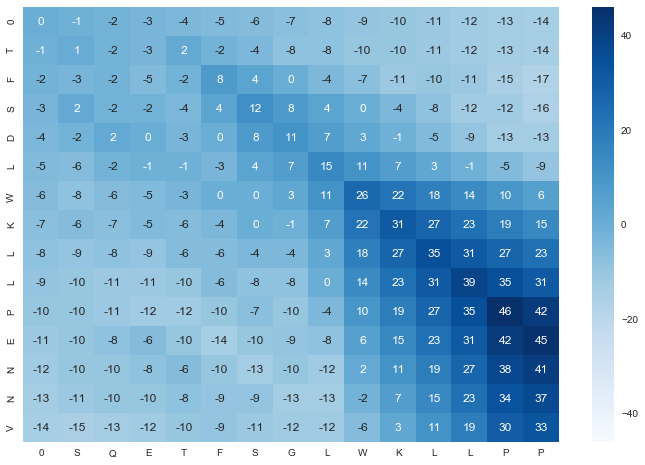

In [18]:
print('Input sequences:\n{}\n{}'.format(mouse_p53, human_p53))
aligned_seq1, aligned_seq2 = trace_best_alignment_with_blosum(scored_dp_matrix_blosum)
print('Optimal global alignment of the given sequences using BLOSUM62 is:\n{}\n{}'.format(
    aligned_seq1, aligned_seq2))
create_heatmap_from_matrix(scored_dp_matrix_blosum)

### Local Alignment:  Smith–Waterman Algorithm

A local alignment, instead of global alignment can be carried out to **finds subsequences** (rather than full length) that align the best.

**Smith–Waterman algorithm** compares segments of all possible lengths and optimizes the similarity score rather than comparing the entire length.

- It is a dynamic programming algorithm, and a **variation of Needleman-Wunsch** (Global) alignment algorithm.
- It **sets negative scoring matrix cells to zero**, which makes local alignments visible.
- **Traceback starts at the highest scoring matrix** cell and proceeds until a cell with score zero is encountered. 
- It has a much higher complexity in time and space, and often cannot be applied to large-scale problems.

### The Biopython Community

Thanks to the very active bioinformatics community of volunteers who have developed, improved and maintained the freely available Python package [Biopython](https://biopython.org/) ([License](https://github.com/biopython/biopython/blob/master/LICENSE.rst)).

The Biopython tools for biological computation (including the different algorithms to handle biological sequences) allows the reproducibility of results obtained from different softwares.

In [16]:
from Bio import pairwise2

alignments = pairwise2.align.localxx(human_p53, mouse_p53)
alignments

[('---TFSD-LWKLLPENNV', 'SQETFS-GLWKLLP---P', 9.0, 3, 18),
 ('---TFSDLWKLLPENNV', 'SQETFSGLWKLLP---P', 9.0, 3, 17),
 ('---TFSD-LWKLLPENNV', 'SQETFS-GLWKLLP--P-', 9.0, 3, 17),
 ('---TFSDLWKLLPENNV', 'SQETFSGLWKLLP--P-', 9.0, 3, 16),
 ('---TFSD-LWKLLPENNV', 'SQETFS-GLWKLLP-P--', 9.0, 3, 16),
 ('---TFSDLWKLLPENNV', 'SQETFSGLWKLLP-P--', 9.0, 3, 15),
 ('---TFSD-LWKLLPENNV', 'SQETFS-GLWKLLPP---', 9.0, 3, 15),
 ('---TFSDLWKLLPENNV', 'SQETFSGLWKLLPP---', 9.0, 3, 14),
 ('---TFSD-LWKLL-PENNV', 'SQETFS-GLWKLLPP----', 9.0, 3, 15),
 ('---TFSDLWKLL-PENNV', 'SQETFSGLWKLLPP----', 9.0, 3, 14),
 ('---TFSD-LWKLLPENNV', 'SQETFS-GLWKLLPP---', 9.0, 3, 14),
 ('---TFSDLWKLLPENNV', 'SQETFSGLWKLLPP---', 9.0, 3, 13)]

### Multiple Sequence Alignment


> ***One or two homologous sequences whisper...a full multiple alignment shouts
out loud*** - Arthur M. Lesk, Penn State University

Alignment carried out for multiple biological sequences (computationally).

- Multiple alignment is a process of arranging multiple sequences to compare them and identify similar regions.
- It indicates degree of sequence conservation:
    - Evolutionary relationship
    - Structurally and functionally important region
    
<img src="images/msa_clustal.png" width="800">

*Created by CLUSTAL Omega, the **highest cited Bioinformatics tools***

**Position Specific Scoring Matrix**

- The scoring is carried out by counting the occurrences of each nucleotide at each position.

<img src="images/pssm.png" width="500">

*Image: http://player.slideplayer.com/17/5286187/#*

**Identify conserved regions, that are of functional importance**

<img src="images/weblogo36.png" width="800">

# Alignment algorithms & Bioinformatics

### ...and why they are my favorites!

- Biological information is studied in sequences/arrays of letters, numbers and scores.
- The sequence similarity is useful for:
    1. assessing gene and protein **homology**
    2. **classifying** genes and proteins by function
    3. **predicting** biological function, secondary and tertiary protein structure
    4. detecting point mutations (for e.g. in diseases)
    5. constructing **evolutionary trees**, etc.

**Alignment algorithms have revolutionized how we do Bioinformatics**

- The pairwise alignment algorithms or dynamic programming and further development of scoring schemes allowed the most important tool **BLAST**: [Basic Local Alignment Search Tool](https://blast.ncbi.nlm.nih.gov/Blast.cgi) for **identifying similar sequences** from database of billions of sequences.

<img src="images/blast.png" width="800">

- The **Multiple Sequence Alignment help us deal with much larger datasets** effectively and characterizing them in functionally related clusters.
    - Based on conserved short sequence, i.e. motifs and domain

**Alignment algorithms are the underlying principle of next generation sequencing studies**

- for e.g. genome, proteome, evolution, meta analysis, and -omics studies drive the entire biomedical field, contributing to the studies of **basic science, diseases, therapeutics** etc.

### Quick Reviewing of alignment algorithms

**Scenario 1**

Searching for similar protein sequence in a database by **pairwise alignments**.

<img src="images/seq_space.png" width="500">

**Scenario 2**

Using **multiple alignment** of similar protein sequences of *known function groups* again new unknown proteins.

<img src="images/protein_groups.png" width="500">

**Scenario 3**

**Predicting protein function** of a new sequence based on the annotation of proteins of *known functions*.

<img src="images/protein_functions.png" width="500">

*Image by Marco Punta, ICR London, EMBO PPPI course*

# Alignment Algorithms & my PhD research

**Part - 1**

During my PhD, I developed a tool, [APRICOT: Analysing Protein-RNA Interaction using Computational Techniques](https://github.com/malvikasharan/APRICOT).

<img src="images/apricot.png" width="800">

- The tool is designed **identify similar proteins in bacteria** as the human proteins of known functions.
- It is **trained on experimental datasets** of human RNA-Binding proteins.
    - Can be adpated to identify proteins of different functional classes.
- Uses **PSSM as one of the main scoring schemes** to identify conserved regions.
- Uses **pairwise alignment of biochemical features** of human and bacteria conserved region.

**Part - 2**

Worked with 100s of next generation sequencing data (public and in-house) datasets of human and bacterial transcriptomes (RNA-Seq) to study:
- Gene expression in **Host-pathogen interaction**
- **Important genes during infections** by relevant pathogens such as *Salmonella*, *Shigella*, *Chlamydia*, and *Staphylococcus*.
- Functions of **non-protein-coding RNAs**
- Experimentally validating **APRICOT predicted RNA-binding proteins** in *Salmonella*

# From learning bioinformatics to teaching!

- I was introduced to these algorithms in my first bioinformatics course. 
- I took this topic up during my masters thesis to identify protein functions in evolutionarily divergent sequences.
- These algorithms helped me conduct my PhD research.
- In my current job as a community manager, I teach them both theroretically and programmatically!

**Preparing this notebook was a great way to pay homage to these alignment algorithms 😇**

<img src="images/thankyou.png" width="500">